# Week 5 Activity: Hypothesis Testing  Solution 1 (data1.csv)


This week you will be using python to visualise some data and perform hypothesis testing. Please refer to lecture __W5.L1: Empirical Methods__.

For further reading, I suggest the following reference book, available online via University library:
+ Peter Bruce, Andrew Bruce, Peter Gedeck (2020), Practical Statistics for Data Scientists: 50+ Essential Concepts Using R and Python. 
<br>Link: https://bris.on.worldcat.org/oclc/1151182591

### Instructions: 

In today's session, you will be visualising and analysing two datasets. These data are stored in the following files:
+ `w5.data/data1.csv`
+ `w5.data/data2.csv`

Each dataset contains a sample of values measured from a population subject to different conditions. We consider these conditions in the abstract and name them condition "a", "b", etc. However, if you want a more concrete example, you could consider that these data are empirical outcomes from your market experiments. For instance, condition "a" could be "markets containing ZIC traders only" and condition "b" could be "markets containing ZIP traders only". Then, each value is mean profit per trader; and each row is the result of one experimental trail. 

Your task is to do the following:
1. select *one* of the datasets
2. summarise the dataset you have chosen: number of columns (i.e., number of conditions), number of instances (i.e., number of rows/trials), mean and standard deviation of each column (i.e., mean and standard deviation of each condition)
3. use a staticial test to determine whether data are normally distributed (e.g., Shapiro-Wilk or Kolmogoroc-Smirnov)
4. visualise the dataset you have chosen to understand the distribution of values under each condition. Consider using scatter plot, histogram, box-and-whisker plot, violin plot, etc.
5. use a statistical hypothesis test to determine whether there is a significant statistical difference between conditions in the dataset (e.g., t-test, ANOVA, Mann-Whitney, Kruskal-Wallis).

If you finish with time remaining, then go back and repeat the above steps using the *other* data set. 

### Getting started. Importing required python libraries

We will be using the following useful libraries to help us perform statistical analysis:

+ `SciPy`: Fundamental algorithms for scientific computing in Python - https://scipy.org
+ `Seaborn`: Statistical data visualisation - https://seaborn.pydata.org
+ `matplotlib`: visualisation with python - https://matplotlib.org
+ `statsmodels`: Functions for estimation of different statistical models - https://www.statsmodels.org/stable/index.html
+ `pandas`: For handling data - https://pandas.pydata.org/docs/getting_started/index.html

Let's begin by importing these python libraries for use today.

In [1]:
# import some useful libraries to help us wrangle data, 
# plot data, and perform statistial analysis 
import scipy as sp
from scipy import stats
import seaborn as sns 
import matplotlib.pyplot as plt 
import statsmodels.api as sm
import pandas as pd

### 1. Read in data1.csv

Select one dataset to work with. Read the dataset from the chosen csv file.

> Hint: Use `pandas` library to read a csv file into a pandas dataframe <br>
> https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

Then show the top rows of the dataframe...

In [2]:
# Read in data from csv file using pandas

# Uncomment the following as required
df = pd.read_csv('w5.data/data1.csv') # read data1 to dataframe
#df = pd.read_csv('w5.data/data2.csv') # read data2 to dataframe

df.head() # show top rows of dataframe

,a,b,c
0,9.488231,14.716073,13.216140
1,11.197358,7.495907,12.922116
2,8.701403,11.570394,9.074421
3,8.610674,16.672563,10.348098
4,14.914451,11.403576,12.848107


We have selected `data1`. We can see that there are three conditions 'a', 'b', and 'c'.

Each column presents a sample distribution of profits generated from three alternative trading stratiges. 

We would like to know whether there is any difference in the profits generated by the three strategies.

### 2. Summarise the data

Briefly summarise the dataset. Find the following:
+ Number and name of conditions
+ Number of instances, n, of each condition
+ Mean and standard deviation of values for each condition

One approach is to open the raw data in the csv file and use Excel to calculate these values. Alternatively, you can use python code:


In [3]:
# Iterate through the columns, output name, 
# number of instances n, mean, and standard deviation
for col in df.columns:
    print("Condition " + "{:}".format(col) + 
          ". n="+"{:}".format(df[col].count()) +
          ", mean="+"{:.2f}".format(df[col].mean()) +
          ", std="+"{:.2f}".format(df[col].std())) 

Condition a. n=15, mean=11.09, std=2.19
Condition b. n=15, mean=13.10, std=3.11
Condition c. n=15, mean=12.61, std=2.23


What do these summary values tell us? Are the profits for all conditions the same? Do some conditions lead to higher profits? Is it possible for us to tell from these values alone?

We can see that we have equal sample size = 15, for each condition. 
At first glance, considering only the mean profit, condition 'b' appears best. Can we stop here? No! Mean values alone tell us very little. 

We need to understand how the data varies. Standard deviation helps us here. Notice that the standard deviation (the variance) around the mean is larger than the differences between the means. Therefore, it is not clear that 'b' is the best from this data alone. We need to do more work.

### 3. Determine whether data are normally distributed

Summary statistics, in isolation, only tell us so much. If we want to accurately analyse these data we need to understand their distributions. In particular, if we want to perform correct hypothesis testing, we must first determine whether the data is (approximately) normally distributed.

The __Shaprio-Wilk__ test and the __Kolmogorov-Smirnov__ test for goodness of fit can help us here: 

> The Shaprio-Wilk test tests the null hypothesiss that the data was drawn from a normal distribution. 
> `stats.shapiro(x)` returns tuple (A,B) where A = test statistic and B = p-value for the hypothesis test. 
> If p-value < 0.05, we reject the null hypothesis, i.e., the data is not drawn from an (approximately) normal distribution 
> If p-value >= 0.05 we cannot reject the null hypothesis that the data is drawn from an approximately normal distribution.

> The Kolmogorov-Smirnov test tests for goodness of fit to a standard normal distribution. 
> To use this test, it is necessary to first normalise our data (to have mean=0 and variance=1).
> To normalise: for each value, subtract the mean, then divide by the standard deviation <br>

There are methods in the `stats` package in `scipy` that enable us to perform these tests:

+ Shapiro-Wilk test for normality: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html <br>
+ Kolmogorov-Smirnov test for goodness of fit: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html#scipy.stats.kstest

Decide which test you will use, then perform the test on each column of your data to see if the data are approximately normally distributed for each condition. What is the p-value for each column? Using this p-value, determine whether your data are (approximately) normally distributed. 


#### Alternative 1: Shapiro-Wilk

In [4]:
# Shapiro-Wilk test tests the null hypothesis that 
# the data was drawn from a normal distribution

print("Using Shapiro-Wilk test to test the null hypothesis " +
      "that the data was drawn from a normal distribution:")

for col in df.columns:
    statistic, pvalue = stats.shapiro(df[col])
    if pvalue < 0.05:
        print("Condition " + "{:}".format(col) + 
              ". We can reject the null hypothesis (p=" + 
              "{:.2f}".format(pvalue) + 
              "). Therefore, data is not normally distributed.")
    else:
        print("Condition " + "{:}".format(col) + 
              ". We cannot reject the null hypothesis (p=" + 
              "{:.2f}".format(pvalue) + 
              "). Therefore, data is normally distributed.")

Using Shapiro-Wilk test to test the null hypothesis that the data was drawn from a normal distribution:
Condition a. We cannot reject the null hypothesis (p=0.98). Therefore, data is normally distributed.
Condition b. We cannot reject the null hypothesis (p=0.68). Therefore, data is normally distributed.
Condition c. We cannot reject the null hypothesis (p=0.73). Therefore, data is normally distributed.


The results of the Shapiro-Wilk test show us that the data for each condition __is__ (approximately) normally distributed.

#### Alternative 2: Kolmogorov-Smirnov

We can use the Kolmogorov-Smirnov test for goodness of fit to a standard normal distribution. However, we must first normalise our data (to have mean=0 and std=1).

In [5]:
# Normalise data
norm_a = (df['a'] - df['a'].mean())/df['a'].std()
norm_b = (df['b'] - df['b'].mean())/df['b'].std()
norm_c = (df['c'] - df['c'].mean())/df['c'].std()

In [6]:
# Perform KS test on normalised datasets
print("Condition a. " + str(stats.kstest(norm_a,'norm')))
print("Condition b. " + str(stats.kstest(norm_b,'norm')))
print("Condition c. " + str(stats.kstest(norm_c,'norm')))

Condition a. KstestResult(statistic=0.10261082960848739, pvalue=0.9925204024671034)
Condition b. KstestResult(statistic=0.14367329426227682, pvalue=0.8739664785292491)
Condition c. KstestResult(statistic=0.1264364460840689, pvalue=0.945483974083064)


All distributions have p>0.05, so null hypothesis is not rejected. Therefore, we can assume that the data is normally distributed.

### 4. Visualise the data

You have determined if your data is normally distributed, or not, using a statistical test. However, it is good practice to always visualise your data. 

#### Visualising normality

Visualisations can also help us to determine the normality of data: are the data unimodal, roughly symmetric, tails not too heavy?

Often, to best understand your data, it is a good idea to visualise it in different ways. 

Here are some common approaches for visualising (lack of) normality in data:

> A __QQ plot__ (formally, a quantile-quantile plot) can be used to visually compare data with a normal distribution. 
> You can use `statsmodels` to create a QQ plot. <br>
> https://www.statsmodels.org/dev/generated/statsmodels.graphics.gofplots.qqplot.html <br>
> The QQ plot plots data from the distribtion against a normal distribution. 
> If the sample data falls close to the red line (showing x=y), then the data is approximately normal. 
> Note that you should normalise your data first (to have mean 0 and standard deviation 1). <br>

> You can plot your distributions using a histogram or kernel density estimation (KDE) to see the distribution shape. 
> If the data is roughly bell-shaped you have (approximately) normal distribution.
> `Seaborn` is a useful library for plotting these graphs: <br> 
> + A __histogram__ is a classic visualization tool that represents the distribution of 
> one or more variables by counting the number of observations that fall within discrete bins: <br>
> https://seaborn.pydata.org/generated/seaborn.histplot.html
> + __Kernel density estimation__ is useful for plotting multiple distributions on one set of axes: <br> 
> https://seaborn.pydata.org/generated/seaborn.kdeplot.html#seaborn.kdeplot

Now try to visualise your data using a QQ plot and/or histograms and/or a KDE plot.


#### Alternative 1. Kernel density estimation (KDE) plot

Use `seaborn` to plot a KDE of data...

<AxesSubplot:ylabel='Density'>

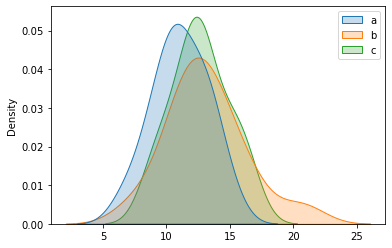

In [7]:
sns.kdeplot(data=df, fill=True)

We can see that the three distributions are bell-shaped, roughly symmetric, and there are not too many outliers. We can be confident that data is approximately normally distributed. This confirms what we discovered before.

#### Alternative 2: Quantile-Quantile (QQ) plot

Use `statsmodels` to create quantile-quantile plots...  

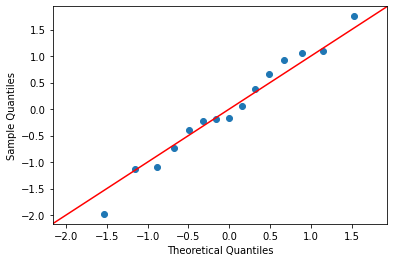

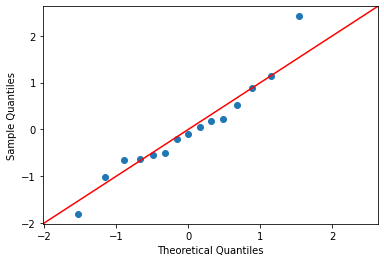

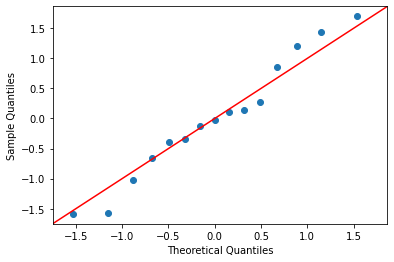

In [8]:
#create Q-Q plot with 45-degree line added to plot
fig = sm.qqplot(norm_a, line='45') # we must use normalised data
fig = sm.qqplot(norm_b, line='45')
fig = sm.qqplot(norm_c, line='45')


For all three conditions, the sample data is close to the red line. We are now convinced that these data are (approximately) normally distributed.

#### Comparing distributions visually 

The data contains results of experiments under multiple conditions. We can use visualisations to compare the results of each condition. 

Attempt the following three approaches to visually compare your data:
+ Create a __barplot__ of mean and confidence interval: https://seaborn.pydata.org/generated/seaborn.barplot.html
+ Create a __box plot__ (or box-and-whisker plot) showing inter-quartile ranges: https://seaborn.pydata.org/generated/seaborn.boxplot.html
+ Create a __violin plot__: https://seaborn.pydata.org/generated/seaborn.violinplot.html

#### Alternative 1: Bar plot

<AxesSubplot:>

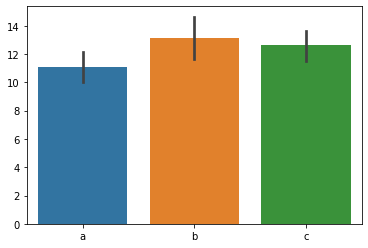

In [9]:
# Use seaborn to create a barplot
sns.barplot(data=df)

#### Alternative 2: Box plot

<AxesSubplot:>

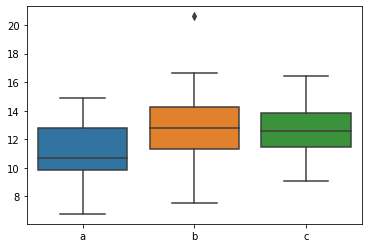

In [10]:
# Use seaborn to create a boxplot
sns.boxplot(data=df)

##### Alternative 3: Violin plot

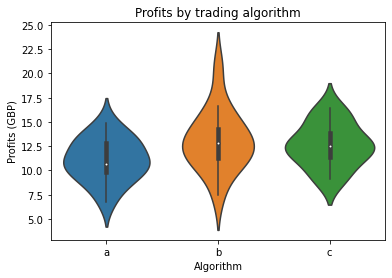

In [11]:
# Use seaborn to create a violin plot
ax = sns.violinplot(data=df, inner='box')

# Label our axes appropriately
ax.set_title("Profits by trading algorithm")
ax.set_ylabel("Profits (GBP)")
ax.set_xlabel("Algorithm")

plt.show()

Qu: Which visual presents the most information? Which presents the least?

+ Notice that the bar plot, particularly if there is no confidence interval plotted, tells us very little indeed.
+ The box and whiskers plot is a much better choice
+ Violin plots also give lots of information about shape of distribution as well as range of values. In each condition, we can see distributions are (approximately) normal.

### 5. Hypothesis testing

So, now you have determind whether or not the data is normal and you have visualised the comparative distributions. You now have a good idea about whether profits appear to be similar under all conditions, or whether some conditions appear to lead to grater profits.

However, to know for sure whether a change in condition results in a change in profits, you need to perform a statistical test.

First, you must set up a null hypothsis. You then perform a statistical test to generate a p-value. If p-value < 0.05 then you can reject the null hypothsis. 

Depending on your data, consider one of the following four hypothesis tests:

+ __t-test__: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html
+ __ANOVA__: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html
+ __Mann-Whitney__: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html.
+ __Kruskal-Wallis__: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html#scipy.stats.kruskal. 

Decide which test is appropriate and then write code to perform the test, below.


#### Hypothesis test selection

We have determined that our data is (approximately) normally distributed. Therefore we can use a __parametric__ test such as t-test or ANOVA.

The t-test is designed for comparing two distributions, but we have three distributions to compare. ANOVA is designed to compare multiple distributions.

Therefore, we should use ANOVA...

In [12]:
# Use stats package from scipy to perform ANOVA 
statistic, pvalue = stats.f_oneway(df['a'],df['b'],df['c'])
if pvalue < 0.05:
    print("ANOVA: (p=" + "{:.2f}".format(pvalue) + 
          " < 0.05). Reject null. The groups have a " +
          "different population mean.") 
else:
    print("ANOVA: (p=" + "{:.2f}".format(pvalue) + 
          " > 0.05). Cannot reject null hypothesis " + 
          "that groups have same population mean.")

ANOVA: (p=0.09 > 0.05). Cannot reject null hypothesis that groups have same population mean.


So, the ANOVA test tells us that we __cannot__ reject the null hypothesis. Therefore there is no statistically significant difference in the mean profit generated by each trading algorithm.

For completeness, let's see what would have happened if we had used multiple t-tests instead...

In [13]:
# Perform t-test on each pair of conditions
pairs = [['a','b'],['a','c'],['b','c']]
for i in range(3):
    statistic, p = stats.ttest_ind(df[pairs[i][0]],df[pairs[i][1]])
    if p < 0.05:
        print("T-test: " + pairs[i][0] + "/" + pairs[i][1] 
              + " (p=" + "{:.3f}".format(p) + " < 0.05). " +
              "Reject null hypothesis that 2 independent " + 
              "samples have identical average (expected) values")
    else:
        print("T-test: "  + pairs[i][0] + "/" + pairs[i][1] + 
              " (p=" + "{:.3f}".format(p) + " > 0.05). " +
              "Cannot reject null hypothesis that 2 independent " +
              "samples have identical average (expected) values")

T-test: a/b (p=0.049 < 0.05). Reject null hypothesis that 2 independent samples have identical average (expected) values
T-test: a/c (p=0.069 > 0.05). Cannot reject null hypothesis that 2 independent samples have identical average (expected) values
T-test: b/c (p=0.622 > 0.05). Cannot reject null hypothesis that 2 independent samples have identical average (expected) values


So, when we perform a series of t-tests, there is evidence that condition a and b have significantly different means. 

This is a different result to ANOVA. Which should we believe? What has happened here? If you can't answer this, then do some further reading.

[END OF DOCUMENT]